In [1]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pandas as pd

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
 
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from sklearn.metrics import make_scorer
 
from sklearn.metrics import classification_report, accuracy_score
import random
random.seed(100)
 
import time
import pyodbc
print(pyodbc.drivers())
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve
)

['SQL Server', 'ODBC Driver 17 for SQL Server', 'SQL Server Native Client RDA 11.0', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

In [57]:

# Load your data
tt_data = pd.read_csv('../data/interim/Final_data_train_test.csv')
val_data = pd.read_csv('../data/interim/Final_data_validation.csv')


In [58]:
tt_data.drop(columns={'Unnamed: 0', 'payer_code', 'age','patient_nbr'}, inplace=True)
val_data.drop(columns={'Unnamed: 0', 'payer_code', 'age', 'patient_nbr'}, inplace=True)


In [59]:
len(tt_data.columns), len(val_data.columns)

(41, 41)

In [169]:
tt_data.head()

,encounter_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,insulin,diabetesMed,readmitted,admission_type_desc,discharge_category,admission_category,number_outpatient_treated,number_inpatient_treated
0,12522,13,68.0,2,28.0,0,8,No,No,1,True,0,Urgent,Discharged to Home,Transfers from Other Facilities,0.0,0.0
1,15738,12,33.0,3,18.0,0,8,No,No,1,True,0,Elective,Transfers to Other Healthcare Facilities,Transfers from Other Facilities,0.0,0.0
2,16680,1,51.0,0,8.0,0,5,No,No,1,True,0,Emergency,Discharged to Home,Emergency Admission,0.0,0.0
3,28236,9,47.0,2,17.0,0,9,No,No,1,True,1,Emergency,Discharged to Home,Emergency Admission,0.0,0.0
4,35754,3,31.0,6,16.0,0,9,No,No,1,True,1,Urgent,Discharged to Home,Physician Referral,0.0,0.0


In [60]:
tt_data.columns

Index(['encounter_id', 'race', 'gender', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_emergency', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_category', 'admission_category',
       'Specialty_Group', 'number_outpatient_treated',
       'number_inpatient_treated', 'total_med_changes'],
      dtype='object')

In [61]:
imp_cols = ['encounter_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_emergency', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_category', 'admission_category', 'number_outpatient_treated',
       'number_inpatient_treated']

In [62]:
# val_data.dtypes

In [63]:
tt_data = tt_data[imp_cols]
val_data = val_data[imp_cols]

In [64]:
tt_data.columns

Index(['encounter_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_emergency',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin',
       'diabetesMed', 'readmitted', 'admission_type_desc',
       'discharge_category', 'admission_category', 'number_outpatient_treated',
       'number_inpatient_treated'],
      dtype='object')

In [70]:
tt_data['diabetesMed'] = tt_data['diabetesMed'].replace({'Yes': True, 'No': False})

C:\Users\rohit\AppData\Local\Temp\ipykernel_352\1438171293.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tt_data['diabetesMed'] = tt_data['diabetesMed'].replace({'Yes': True, 'No': False})


In [167]:
tt_data.dtypes

encounter_id                   int64
time_in_hospital               int64
num_lab_procedures           float64
num_procedures                 int64
num_medications              float64
number_emergency               int64
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                     object
insulin                        int64
diabetesMed                     bool
readmitted                     int64
admission_type_desc           object
discharge_category            object
admission_category            object
number_outpatient_treated    float64
number_inpatient_treated     float64
dtype: object

In [72]:
# tt_data.head()

In [73]:
# val_data.head()

In [171]:
tt_data['max_glu_serum'].unique()

array(['No', '>300', 'Norm', '>200'], dtype=object)

In [74]:
# Check for unique values in categorical columns
categorical_columns_tt = tt_data.select_dtypes(include=['object']).columns
categorical_columns_tt

Index(['max_glu_serum', 'A1Cresult', 'admission_type_desc',
       'discharge_category', 'admission_category'],
      dtype='object')

In [75]:
# Check for unique values in categorical columns
categorical_columns_val = val_data.select_dtypes(include=['object']).columns
categorical_columns_val


Index(['max_glu_serum', 'A1Cresult', 'admission_type_desc',
       'discharge_category', 'admission_category'],
      dtype='object')

In [77]:
# tt_data.dtypes, val_data.dtypes

In [78]:
# tt_data.columns, val_data.columns

In [79]:
# One-Hot Encoding for categorical variables

X = pd.get_dummies(tt_data.drop(columns=['readmitted']), columns=categorical_columns_tt, drop_first=True)
y = tt_data['readmitted']

In [82]:
train_feat = X.columns
train_feat

Index(['encounter_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_emergency',
       'number_diagnoses', 'insulin', 'diabetesMed',
       'number_outpatient_treated', 'number_inpatient_treated',
       'max_glu_serum_>300', 'max_glu_serum_No', 'max_glu_serum_Norm',
       'A1Cresult_>8', 'A1Cresult_No', 'A1Cresult_Norm',
       'admission_type_desc_Emergency', 'admission_type_desc_Other',
       'admission_type_desc_Urgent', 'discharge_category_Discharged to Home',
       'discharge_category_Other',
       'discharge_category_Transfers to Other Healthcare Facilities',
       'admission_category_Other', 'admission_category_Physician Referral',
       'admission_category_Transfers from Other Facilities'],
      dtype='object')

In [83]:
# One-Hot Encoding for categorical variables

X_val = pd.get_dummies(val_data.drop(columns=['readmitted']), columns=categorical_columns_val, drop_first=True)
y_val = val_data['readmitted']

In [84]:
def ensure_all_columns_present(df, important_cols):
    # Iterate over the important columns
    for col in important_cols:
        # If the column is not in the dataframe, add it with a default value of 0
        if col not in df.columns:
            df[col] = 0
    return df

In [85]:
X_val = ensure_all_columns_present(X_val, train_feat)
X_val.columns


Index(['encounter_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_emergency',
       'number_diagnoses', 'insulin', 'diabetesMed',
       'number_outpatient_treated', 'number_inpatient_treated',
       'max_glu_serum_>300', 'max_glu_serum_No', 'max_glu_serum_Norm',
       'A1Cresult_>8', 'A1Cresult_No', 'A1Cresult_Norm',
       'admission_type_desc_Emergency', 'admission_type_desc_Other',
       'admission_type_desc_Urgent', 'discharge_category_Discharged to Home',
       'discharge_category_Other',
       'discharge_category_Transfers to Other Healthcare Facilities',
       'admission_category_Other', 'admission_category_Physician Referral',
       'admission_category_Transfers from Other Facilities'],
      dtype='object')

In [86]:
# X_val = X_val[imp_cols_logit]

In [87]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [91]:
# lr_model = LogisticRegression(C= 0.01, penalty='l2', solver='liblinear')
model = RandomForestClassifier(max_depth= 5, min_samples_split= 30,n_estimators=200, random_state=42)


In [151]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train.drop(columns='encounter_id'), y_train)

    # Predictions for train, validation, and test sets
    y_train_pred = model.predict(X_train.drop(columns='encounter_id'))
    y_test_pred = model.predict(X_test.drop(columns='encounter_id'))
    y_val_pred = model.predict(X_val.drop(columns='encounter_id'))
    
    # Predicted probabilities for ROC/PR curve
    y_train_proba = model.predict_proba(X_train.drop(columns='encounter_id'))[:, 1]
    y_test_proba = model.predict_proba(X_test.drop(columns='encounter_id'))[:, 1]
    y_val_proba = model.predict_proba(X_val.drop(columns='encounter_id'))[:, 1]

    # Calculate metrics for train, validation, and test sets
    metrics_train = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'ROC AUC': roc_auc_score(y_train, y_train_proba)
    }

    metrics_val = {
        'Accuracy': accuracy_score(y_val, y_val_pred),
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred),
        'ROC AUC': roc_auc_score(y_val, y_val_proba)
    }

    metrics_test = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'ROC AUC': roc_auc_score(y_test, y_test_proba)
    }

    # Combine the metrics into a DataFrame
    metrics_df = pd.DataFrame([metrics_train, metrics_test, metrics_val], index=['Train', 'Test', 'Validation'])

    # Plot ROC curve for test results
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
    plt.figure(figsize=(14, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr_test, tpr_test, label=f'Test ROC AUC = {metrics_test["ROC AUC"]:.2f}')
    plt.plot(fpr_val, tpr_val, label=f'Validation ROC AUC = {metrics_val["ROC AUC"]:.2f}', linestyle='--')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # PR Curve for test results
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_proba)
    plt.subplot(1, 2, 2)
    plt.plot(recall_test, precision_test, label='Test PR Curve')
    plt.plot(recall_val, precision_val, label='Validation PR Curve', linestyle='--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

    # Confusion Matrix for test results
    cm_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - Test Data')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return metrics_df

In [152]:
# evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)

In [153]:
# dt_model = DecisionTreeClassifier(max_depth= 10,min_samples_leaf=1,min_samples_split= 5, random_state=42)

In [154]:
# evaluate_model(dt_model, X_train, y_train, X_val, y_val, X_test, y_test)

In [155]:
rf_model = RandomForestClassifier(max_depth=8, min_samples_split= 10,n_estimators=300,min_samples_leaf=3, random_state=42)

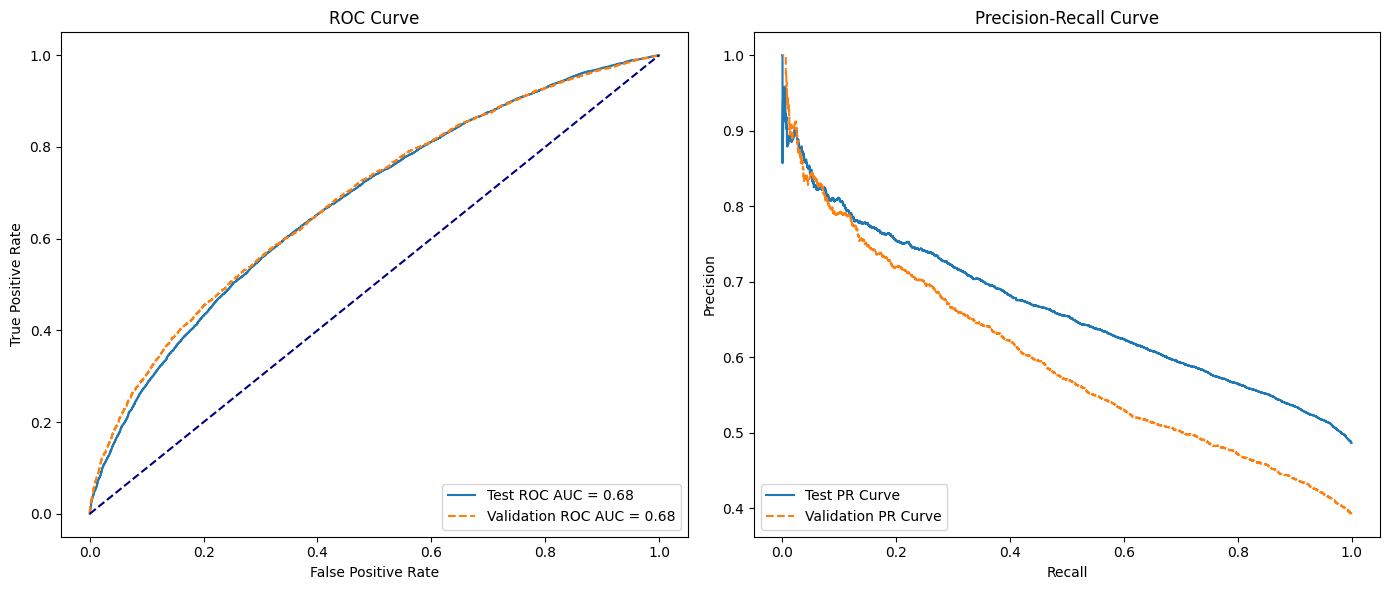

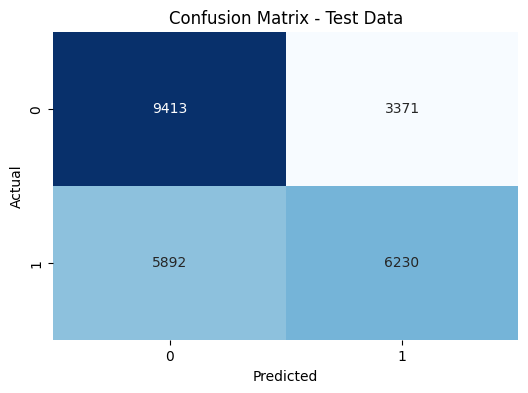

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.634665,0.657229,0.521196,0.581361,0.695598
Test,0.628082,0.648891,0.513942,0.573586,0.678544
Validation,0.626792,0.520894,0.618312,0.565438,0.684785


In [156]:
evaluate_model(rf_model, X_train, y_train, X_val, y_val, X_test, y_test)

In [134]:
len(rf_model.feature_importances_)

26

In [133]:
len(X_train.columns)

26

In [158]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.drop(columns='encounter_id').columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df



,Feature,Importance
9,number_inpatient_treated,0.403025
5,number_diagnoses,0.125537
4,number_emergency,0.088220
8,number_outpatient_treated,0.071368
24,admission_category_Transfers from Other Facili...,0.054111
3,num_medications,0.052103
1,num_lab_procedures,0.039751
0,time_in_hospital,0.025132
2,num_procedures,0.023377
7,diabetesMed,0.018781


In [168]:
import pickle

# Save the model using pickle
with open('../model/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [98]:
xgboost_model = XGBClassifier(learning_rate=0.2, max_depth= 7,n_estimators= 200, random_state=42)

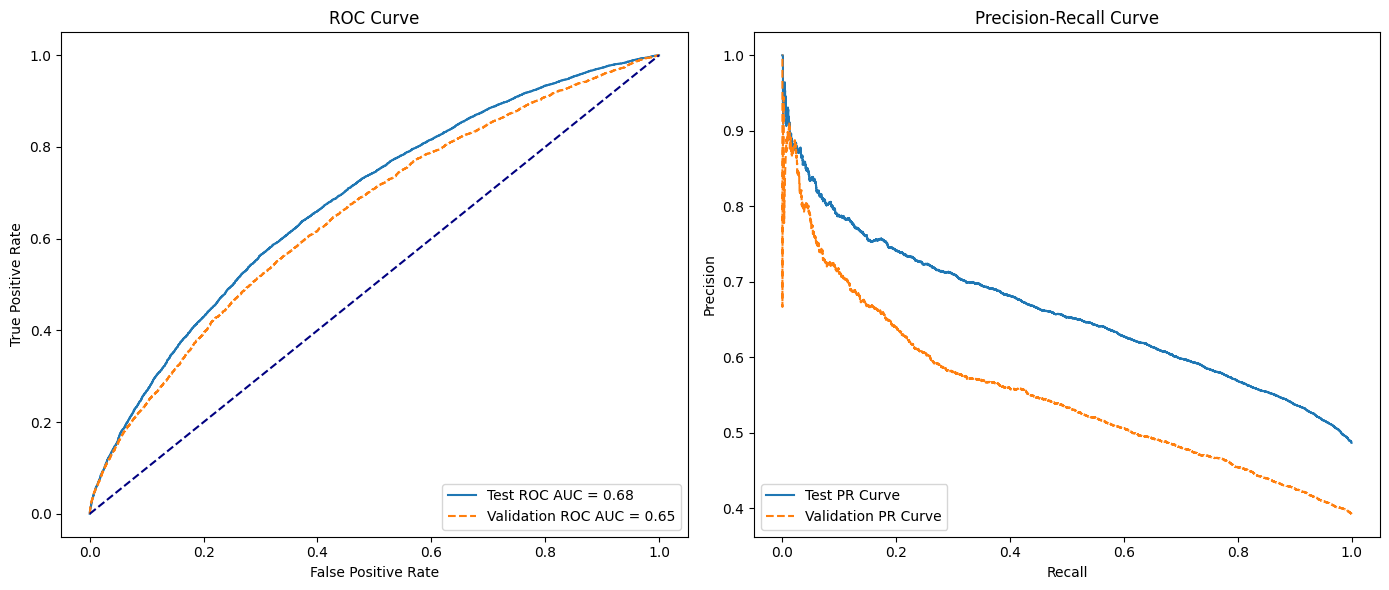

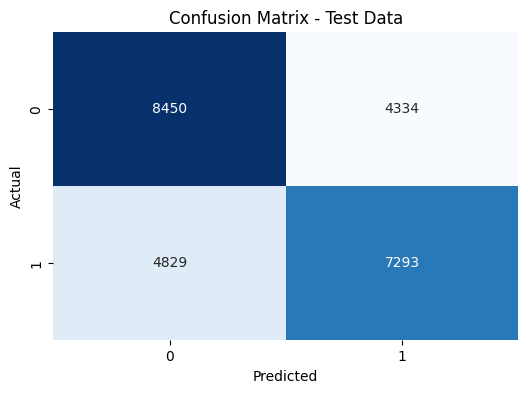

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.775327,0.784372,0.742495,0.762860,0.862309
Validation,0.611601,0.504551,0.605210,0.550316,0.652134
Test,0.632097,0.627247,0.601633,0.614173,0.680871


In [99]:
evaluate_model(xgboost_model, X_train, y_train, X_val, y_val, X_test, y_test)

## Hyperparameter Tuning

In [100]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

precision_scorer = make_scorer(precision_score, average='binary')  # or 'macro'/'micro' depending on your use case


In [103]:
from sklearn.model_selection import RandomizedSearchCV


random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_grid,
                                   n_iter=100,  # number of different combinations to try
                                   scoring=precision_scorer,
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and precision score
best_params = random_search.best_params_
best_precision = random_search.best_score_

print(f"Best Parameters (Randomized Search): {best_params}")
print(f"Best Precision Score (Randomized Search): {best_precision}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier()
}

In [ ]:
# Hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree Classifier": {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest Classifier": {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0]
    }
}

In [ ]:
# Custom function to evaluate models with hyperparameter tuning
def evaluate_models(models, param_grids, X_train, X_test, y_train, y_test):
    # Drop non-predictive columns
    X_train_processed = X_train.drop(['ClaimID', 'Provider'], axis=1)
    X_test_processed = X_test.drop(['ClaimID', 'Provider'], axis=1)
   
    # Define scoring metric to optimize (maximize recall)
    scoring = make_scorer(recall_score)
 
    # Iterate through each model and perform hyperparameter tuning
    for model_name, model in models.items():
        with mlflow.start_run():
            print(f"\nTuning hyperparameters for: {model_name}")
 
            # Perform GridSearchCV for hyperparameter tuning
            grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring=scoring, n_jobs=-1)
            grid_search.fit(X_train_processed, y_train)
 
            # Get the best model after hyperparameter tuning
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
 
            # Log best hyperparameters
            mlflow.log_params(best_params)
 
            # Make predictions with the best model
            y_train_pred = best_model.predict(X_train_processed)
            y_test_pred = best_model.predict(X_test_processed)
 
            # Calculate metrics
            metrics = {
                'accuracy': {
                    'train': accuracy_score(y_train, y_train_pred),
                    'test': accuracy_score(y_test, y_test_pred)
                },
                'precision': {
                    'train': precision_score(y_train, y_train_pred),
                    'test': precision_score(y_test, y_test_pred)
                },
                'recall': {
                    'train': recall_score(y_train, y_train_pred),
                    'test': recall_score(y_test, y_test_pred)
                },
                'roc_auc': {
                    'train': roc_auc_score(y_train, best_model.predict_proba(X_train_processed)[:, 1]),
                    'test': roc_auc_score(y_test, best_model.predict_proba(X_test_processed)[:, 1])
                }
            }
 
            # Log metrics with model name included
            for metric_name, metric_values in metrics.items():
                mlflow.log_metric(f"{model_name}_train_{metric_name}", metric_values['train'])
                mlflow.log_metric(f"{model_name}_test_{metric_name}", metric_values['test'])
 
            # Log feature importance if applicable
            if hasattr(best_model, 'feature_importances_'):
                feature_importances = best_model.feature_importances_
            elif hasattr(best_model, 'coef_'):
                feature_importances = best_model.coef_[0]
            else:
                feature_importances = None
 
            if feature_importances is not None:
                # Create a DataFrame for better logging
                importance_df = pd.DataFrame({
                    'Feature': X_train_processed.columns,
                    'Importance': feature_importances
                }).sort_values(by='Importance', ascending=False)
 
                # Log the feature importances as an artifact
                importance_file_path = f"mlruns/{model_name}_feature_importances.csv"
                importance_df.to_csv(importance_file_path, index=False)
                mlflow.log_artifact(importance_file_path)
 
            # Log the best model
            mlflow.sklearn.log_model(best_model, model_name)
 
            # End the run
            mlflow.end_run()

In [ ]:
# Call the function with the models, param grids, and training/testing datasets
evaluate_models(models, param_grids, X_train, X_test, y_train, y_test)

In [27]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    classification_report,
    make_scorer,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV

def evaluate_single_model(model, param_grid, X_train, X_test, y_train, y_test):
    # Drop non-predictive columns
    X_train_processed = X_train.drop(['encounter_id'], axis=1)
    X_test_processed = X_test.drop(['encounter_id'], axis=1)
    
    # Define scoring metric to optimize (maximize recall)
    scoring = make_scorer(recall_score)

    with mlflow.start_run():
        print(f"\nTuning hyperparameters for: {model.__class__.__name__}")
        
        # Perform GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1)
        grid_search.fit(X_train_processed, y_train)
        
        # Get the best model after hyperparameter tuning
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        # Log best hyperparameters
        mlflow.log_params(best_params)
        
        # Make predictions with the best model
        y_train_pred = best_model.predict(X_train_processed)
        y_test_pred = best_model.predict(X_test_processed)
        
        # Calculate metrics
        metrics = {
            'accuracy': {
                'train': accuracy_score(y_train, y_train_pred),
                'test': accuracy_score(y_test, y_test_pred)
            },
            'precision': {
                'train': precision_score(y_train, y_train_pred),
                'test': precision_score(y_test, y_test_pred)
            },
            'recall': {
                'train': recall_score(y_train, y_train_pred),
                'test': recall_score(y_test, y_test_pred)
            },
            'roc_auc': {
                'train': roc_auc_score(y_train, best_model.predict_proba(X_train_processed)[:, 1]),
                'test': roc_auc_score(y_test, best_model.predict_proba(X_test_processed)[:, 1])
            }
        }

        # Log metrics with model name included
        for metric_name, metric_values in metrics.items():
            mlflow.log_metric(f"{model.__class__.__name__}_train_{metric_name}", metric_values['train'])
            mlflow.log_metric(f"{model.__class__.__name__}_test_{metric_name}", metric_values['test'])

        # Log feature importance if applicable
        if hasattr(best_model, 'feature_importances_'):
            feature_importances = best_model.feature_importances_
        elif hasattr(best_model, 'coef_'):
            feature_importances = best_model.coef_[0]
        else:
            feature_importances = None

        if feature_importances is not None:
            # Create a DataFrame for better logging
            importance_df = pd.DataFrame({
                'Feature': X_train_processed.columns,
                'Importance': feature_importances
            }).sort_values(by='Importance', ascending=False)

            # Log the feature importances as an artifact
            importance_file_path = f"{model.__class__.__name__}_feature_importances.csv"
            importance_df.to_csv(importance_file_path, index=False)
            mlflow.log_artifact(importance_file_path)

        # Log the best model
        mlflow.sklearn.log_model(best_model, model.__class__.__name__)

        # End the run
        mlflow.end_run()

        # Evaluation Report
        print(classification_report(y_test, y_test_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'{model.__class__.__name__} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # ROC-AUC Curve
        y_proba = best_model.predict_proba(X_test_processed)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'{model.__class__.__name__} - ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.figure(figsize=(6, 5))
        plt.plot(recall, precision, label='Precision-Recall curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model.__class__.__name__} - Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.show()





Tuning hyperparameters for: LogisticRegression


2024/10/08 22:47:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0       0.64      0.66      0.65     13360
           1       0.61      0.59      0.60     12140

    accuracy                           0.63     25500
   macro avg       0.63      0.63      0.63     25500
weighted avg       0.63      0.63      0.63     25500



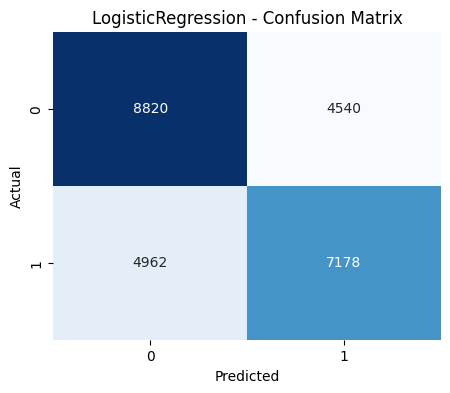

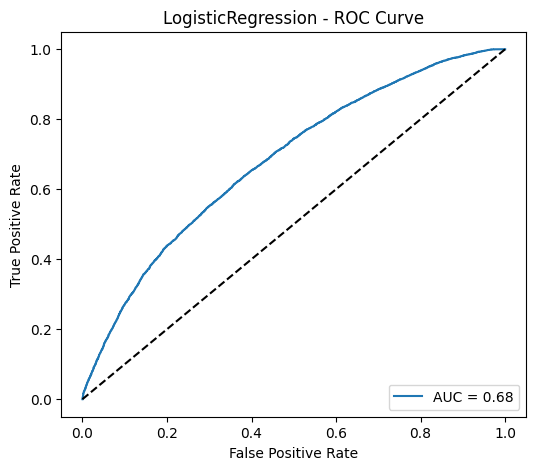

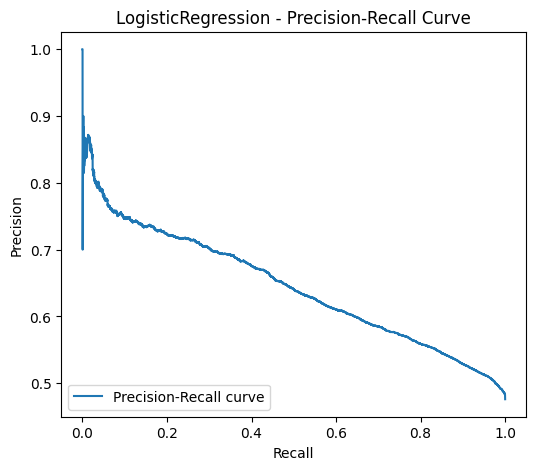

In [28]:
# Example usage with one model and hyperparameters
model = LogisticRegression(class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Call the function with the model, param grid, and training/testing datasets
evaluate_single_model(model, param_grid, X_train, X_test, y_train, y_test)


Tuning hyperparameters for: DecisionTreeClassifier


2024/10/08 22:54:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0       0.64      0.64      0.64     13360
           1       0.60      0.61      0.61     12140

    accuracy                           0.62     25500
   macro avg       0.62      0.62      0.62     25500
weighted avg       0.62      0.62      0.62     25500



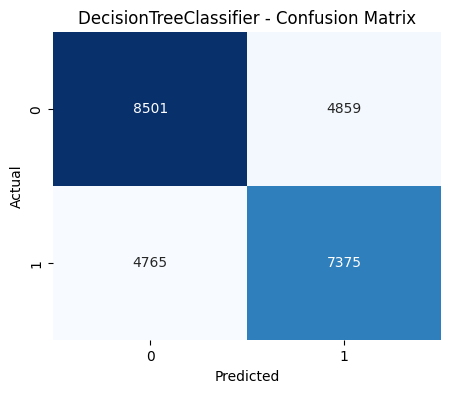

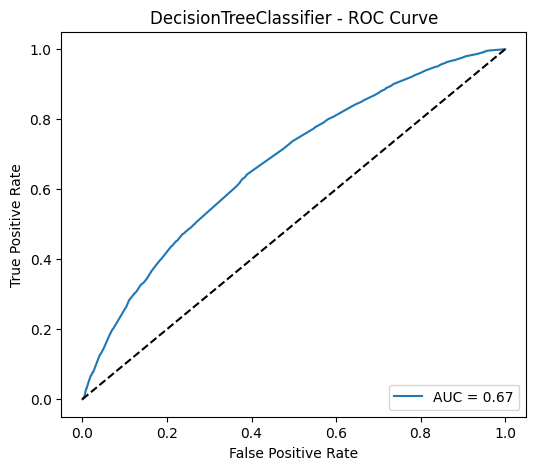

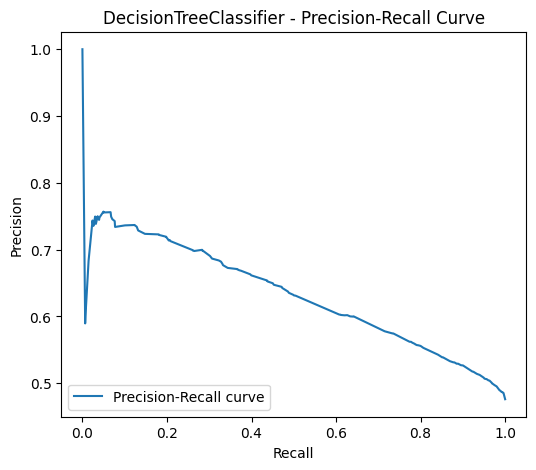

In [29]:
# 2. Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
evaluate_single_model(model_dt, param_grid_dt, X_train, X_test, y_train, y_test)

In [ ]:
# 3. Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
evaluate_single_model(model_rf, param_grid_rf, X_train, X_test, y_train, y_test)



Tuning hyperparameters for: RandomForestClassifier


In [ ]:
# 4. XGBoost Classifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
evaluate_single_model(model_xgb, param_grid_xgb, X_train, X_test, y_train, y_test)
